In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
import moviepy.editor as mpy
from PIL import Image

plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_1p4"


# To generate animations
def mpl_fig2array(plt):
    with io.BytesIO() as buffer:  # use buffer memory
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        img = Image.open(buffer)
        return np.asarray(img)

In [2]:
# Load dataframe
df = pd.read_parquet(f"../{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

,normalized amplitude in xy-plane,q1,q2,nb,on_x1,oct_current,bunch_nb
name 1,,,,,,,
madx_000,3.938,62.305,60.305,1.400000e+11,250.0,60.0,1963.0
madx_001,3.594,62.305,60.306,1.400000e+11,250.0,60.0,1963.0
madx_002,3.656,62.305,60.307,1.400000e+11,250.0,60.0,1963.0
madx_003,3.719,62.305,60.308,1.400000e+11,250.0,60.0,1963.0
madx_004,3.875,62.305,60.309,1.400000e+11,250.0,60.0,1963.0
...,...,...,...,...,...,...,...
madx_446,8.938,62.322,60.326,1.400000e+11,250.0,60.0,1963.0
madx_447,8.406,62.322,60.327,1.400000e+11,250.0,60.0,1963.0
madx_448,5.750,62.322,60.328,1.400000e+11,250.0,60.0,1963.0


In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index  = 'q2', columns = 'q1', values = 'normalized amplitude in xy-plane')
df_to_plot

q1,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,62.315,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323
q2,,,,,,,,,,,,,,,,,,,
60.305,3.938,3.844,3.969,3.781,3.812,3.844,4.094,4.156,3.750,4.219,4.188,4.250,4.562,4.250,5.219,4.688,NaN,NaN,NaN
60.306,3.594,3.719,4.000,3.875,3.656,4.000,3.906,3.906,4.031,3.844,4.188,4.000,4.094,4.469,5.750,4.688,9.469,9.469,NaN
60.307,3.656,3.562,3.719,3.781,3.688,4.125,3.562,4.156,3.688,4.094,4.062,4.344,3.812,4.469,5.219,4.844,8.938,NaN,9.469
60.308,3.719,3.625,3.469,3.594,3.781,3.500,3.938,4.219,3.875,4.062,4.531,4.250,4.562,5.469,5.156,5.156,9.469,NaN,NaN
60.309,3.875,3.562,3.375,3.750,3.719,3.938,4.000,4.906,4.500,5.438,5.594,5.906,5.406,5.625,6.281,6.812,NaN,NaN,NaN
60.310,3.719,3.844,3.781,3.625,3.750,3.688,4.969,5.281,5.375,5.625,5.562,5.438,5.531,5.750,6.281,5.344,NaN,NaN,NaN
60.311,3.812,3.938,3.906,3.719,4.375,4.188,5.188,5.469,5.594,5.531,5.844,5.719,5.719,5.469,5.375,5.344,NaN,NaN,NaN
60.312,3.875,3.875,3.812,3.719,3.375,4.875,5.344,5.750,5.844,5.438,5.594,5.656,5.344,5.656,5.562,6.812,NaN,NaN,NaN
60.313,3.875,3.906,3.719,3.469,5.094,5.562,5.812,5.750,5.719,5.562,5.688,5.938,6.219,5.750,5.281,5.812,NaN,NaN,NaN


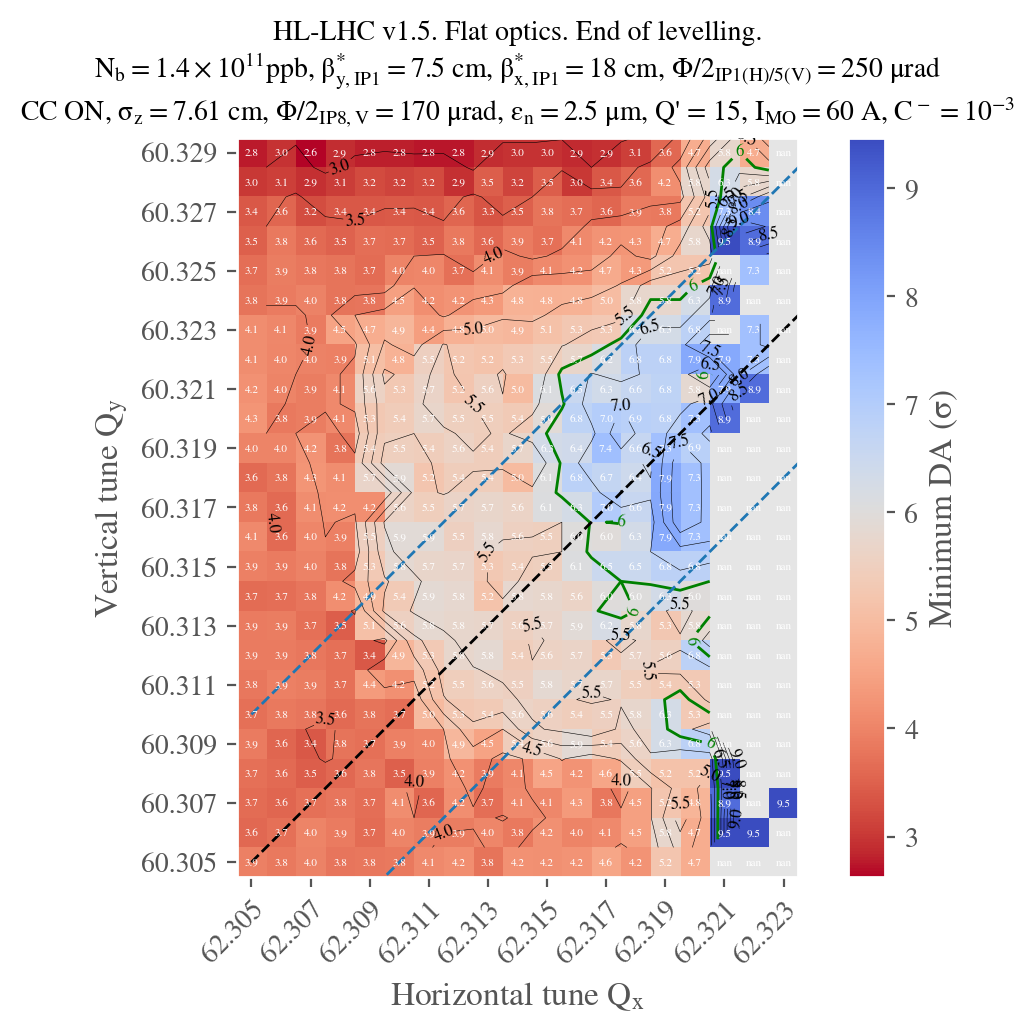

In [4]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str
    
def plot_heatmap(df_to_plot):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(data_array, cmap="coolwarm_r")
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="w", fontsize=4
            )

    CSS = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        data_array,
        colors="black",
        levels=list(np.arange(3,6,0.5)) + list(np.arange(6.5,10,0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        data_array,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)


    # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
    # Identity line
    ax.plot([0, 1000], [0, 1000], color="black", linestyle="--", linewidth=1)
    # plus minus 0.05 line (Q increment is 10**-3)
    ax.plot([0, 1000], [5, 1005], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-5, 995], color="tab:blue", linestyle="--", linewidth=1)

    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling."
        + "\n"
        + f"$N_b = $"
        + latex_float(df.nb.min())
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + "CC ON, "
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 15"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$",
        fontsize = 10)
    ax.set_xlabel("Horizontal tune " + r"$Q_x$")
    ax.set_ylabel("Vertical tune " + r"$Q_y$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)


    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)
    plt.savefig("output_" + STUDY_NAME + ".pdf",  bbox_inches='tight')
    plt.show()

plot_heatmap(df_to_plot)

### Make a widget to see how heatmap evolves with number of turn

In [5]:
df_evolution = pd.read_parquet(f"../{STUDY_NAME}/da_evolution.parquet")
df_evolution = df_evolution.round(3)

# Only keep relevant columns
df_evolution = df_evolution[['name 1', "q1", "q2", "nb", "normalized amplitude in xy-plane", "on_x1", "oct_current", "bunch_nb", "at_turn"]]
df_evolution

,name 1,q1,q2,nb,normalized amplitude in xy-plane,on_x1,oct_current,bunch_nb,at_turn
80,madx_000,62.305,60.305,1.400000e+11,4.094,250.0,60.0,1963,924174
81,madx_000,62.305,60.305,1.400000e+11,3.938,250.0,60.0,1963,864807
82,madx_000,62.305,60.305,1.400000e+11,4.062,250.0,60.0,1963,819406
83,madx_000,62.305,60.305,1.400000e+11,4.000,250.0,60.0,1963,795301
84,madx_000,62.305,60.305,1.400000e+11,4.062,250.0,60.0,1963,750779
...,...,...,...,...,...,...,...,...,...
80,madx_452,62.323,60.307,1.400000e+11,9.844,250.0,60.0,1963,748
81,madx_452,62.323,60.307,1.400000e+11,9.594,250.0,60.0,1963,686
82,madx_452,62.323,60.307,1.400000e+11,9.875,250.0,60.0,1963,608
83,madx_452,62.323,60.307,1.400000e+11,9.969,250.0,60.0,1963,557


In [6]:
def filter_dataframe(df, n_turns= 1000000):
    # Only keep data up to n_turns, to emulate smaller simulations
    df_filtered = df[df["at_turn"] <= n_turns]
    df_filtered = pd.DataFrame(
        [
            df_filtered.groupby("name 1")["normalized amplitude in xy-plane"].min(),
            df_filtered.groupby("name 1")["q1"].mean(),
            df_filtered.groupby("name 1")["q2"].mean(),
            df_filtered.groupby("name 1")["nb"].mean(),
            df_filtered.groupby("name 1")["on_x1"].mean(),
            df_filtered.groupby("name 1")["oct_current"].mean(),
            df_filtered.groupby("name 1")["bunch_nb"].mean(),
        ]
    ).transpose()

    # Round otherwise pivot won't work
    df_filtered = df_filtered.round(3)

    # Prepare for plotting
    df_filtered = df_filtered.pivot(index  = 'q2', columns = 'q1', values = 'normalized amplitude in xy-plane')
    return df_filtered

In [17]:
def plot_heatmap_evolution(
    df_evolution,
    animation=False,
    gif_path="test.gif",
    fps=60,
    duration=5,
):
    # Initally filter for 1M turns
    df_to_plot = filter_dataframe(df_evolution, n_turns=1000000)

    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()

    fig, ax = plt.subplots(figsize=(10, 10))

    im = ax.imshow(data_array, cmap="coolwarm_r", vmin = 2, vmax = 10, interpolation='none')
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Identity line
    ax.plot([0, 1000], [0, 1000], color="black", linestyle="--", linewidth=1)
    # plus minus 0.05 line (Q increment is 10**-3)
    ax.plot([0, 1000], [5, 1005], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-5, 995], color="tab:blue", linestyle="--", linewidth=1)

    ax.set_xlabel("Horizontal tune " + r"$Q_x$")
    ax.set_ylabel("Vertical tune " + r"$Q_y$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Create colorbar
    norm = matplotlib.colors.Normalize(vmin=2, vmax=10)
    cbar = ax.figure.colorbar(im, ax=ax, norm=norm,)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)

    # Update value with widget
    k_min = 1000
    k_max = 1000000
    k_step = duration / fps
    slider_range = np.linspace(k_min, k_max, duration * fps)
    int_slider = widgets.IntSlider(
        value=1000000, min=k_min, max=k_max, step=k_step, description=r"N", continuous_update=False
    )

    def update(change):
        global CS1, CS2, CS1_label, CS2_label
        # Get numpy array from dataframe
        df_to_plot = filter_dataframe(df_evolution, n_turns=int_slider.value)
        data_array = df_to_plot.to_numpy()

        # Update image
        im.set_data(data_array)

        # Update contour lines, deleting old ones (including labels)
        try:
            for coll in CS1.collections:
                coll.remove()
            for coll in CS2.collections:
                coll.remove()
            for str in CS1_label:
                str.remove()
            for str in CS2_label:
                str.remove()
        except:
            pass
        CS1 = ax.contour(
            np.arange(0.5, data_array.shape[1]),
            np.arange(0.5, data_array.shape[0]),
            data_array,
            colors="black",
            levels=list(np.arange(3,6,0.5)) + list(np.arange(6.5,10,0.5)),
            linewidths=0.2,
        )
        CS1_label = ax.clabel(CS1, inline=1, fontsize=15)
        CS2 = ax.contour(
            np.arange(0.5, data_array.shape[1]),
            np.arange(0.5, data_array.shape[0]),
            data_array,
            colors="green",
            levels=[6],
            linewidths=1,
        )
        CS2_label = ax.clabel(CS2, inline=1, fontsize=15)
        
        # Add text to indicate slider value
        ax.set_title(
            "HL-LHC v1.5. Flat optics. End of levelling." + f" $N = {int_slider.value}$"
            + "\n"
            + f"$N_b = $"
            + latex_float(df.nb.min())
            + "ppb, "
            + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
            + ", "
            + r"$\beta^{*}_{x,IP1} = 18$ cm"
            + ", "
            + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
            + "\n"
            + "CC ON, "
            + r"$\sigma_{z} = 7.61$ $cm$"
            + ", "
            + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
            + ", "
            + r"$\epsilon_{n} = 2.5$ $\mu m$"
            + ", "
            + r"Q' = 15"
            + ", "
            + r"$I_{MO} = 60$ $A$"
            + ", "
            + r"$C^-=10^{-3}$"
        )
        fig.canvas.draw_idle()

    int_slider.observe(update, "value")

    # Function to convert interaction to an animation
    def make_frame(t):
        idx = int(round(t * fps))
        int_slider.value = slider_range[idx]
        update(None)
        return mpl_fig2array(plt)

    if animation:
        animation = mpy.VideoClip(make_frame, duration=duration)
        animation.write_gif(gif_path, fps=fps, program = "ImageMagick", opt = "optimizetransparency", fuzz = 0)
        #animation.write_videofile("test.mp4", codec = 'mpeg4', fps = fps)

    return int_slider



t:  22%|██▏       | 66/300 [07:44<01:13,  3.17it/s, now=None]

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



t:  22%|██▏       | 66/300 [09:18<01:13,  3.17it/s, now=None]

Moviepy - Done !
Moviepy - video ready test.mp4


IntSlider(value=1000000, continuous_update=False, description='N', max=1000000, min=1000, step=0)

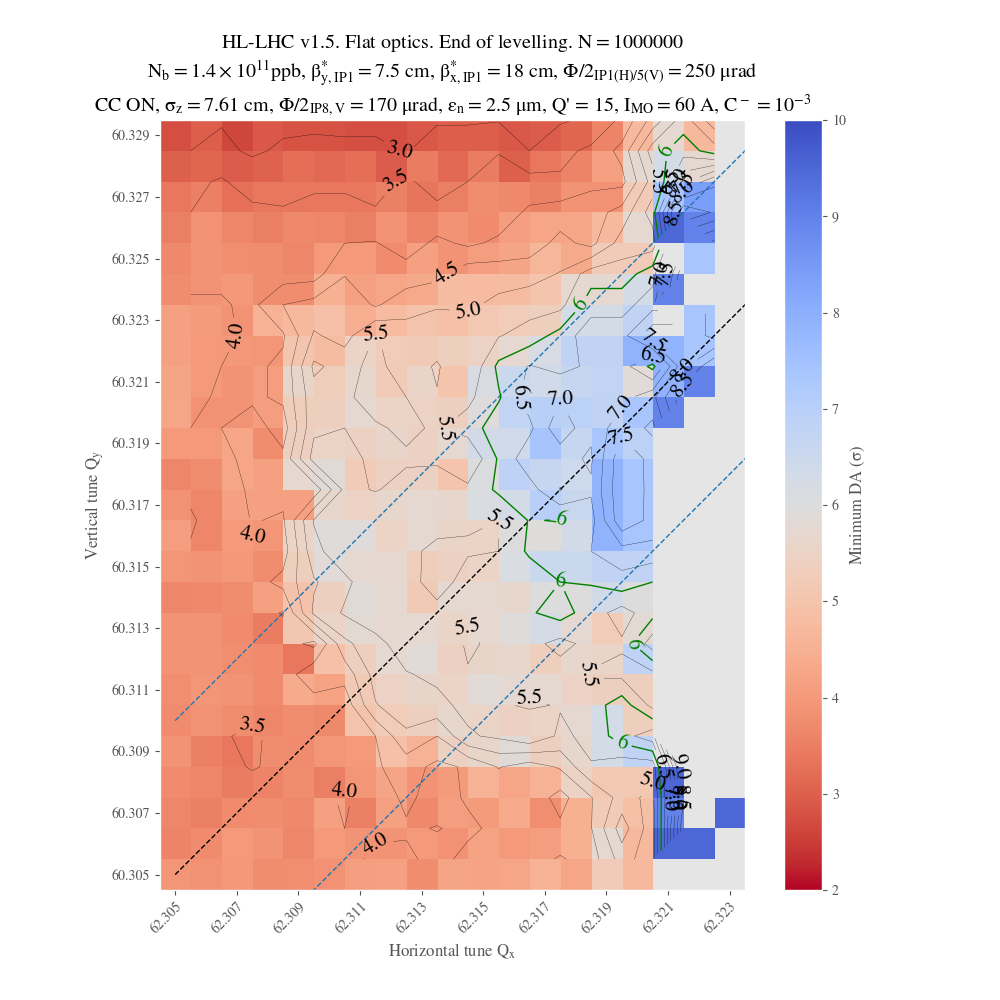

In [18]:
%matplotlib widget
vbox = plot_heatmap_evolution(df_evolution, animation=True, duration = 10, fps = 30)
display(vbox)